In [1]:
import pandas as pd
import re 

reviews = pd.read_csv('../Data/Cleaned Data/final_dataset_cleaned.csv')

reviews = reviews.dropna()


print(reviews.shape)

(97529, 17)


In [2]:

reviews.head()

,recipe_id,name,n_steps,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating,review_cleaned
0,8694,margaret lefever s wonderful baked beans,10,6,315,326.2,13.0,75.0,14.0,28.0,13.0,16.0,8629,2001-04-22,I tried this recipe because it was the first s...,2,small quantity baked bean found starter doctor...
1,5315,icy holiday punch,5,6,1440,54.5,0.0,50.0,0.0,0.0,0.0,4.0,8629,2001-04-24,I brought this to an office holiday party and ...,4,brought office holiday party everyone enjoyed
2,9014,cheesy potato skillet stuff,5,5,40,357.8,33.0,6.0,22.0,30.0,37.0,8.0,11297,2001-06-18,What a great quick & easy meal especially for ...,4,quick meal mushroom lovers
3,580,garlic mushroom sauce,10,7,36,120.3,9.0,4.0,30.0,3.0,20.0,1.0,11297,2001-06-25,Easy and tasty. Really made my steak special. ...,4,tasty steak special doreen
4,9492,chicken honey glazed,6,7,100,484.9,11.0,189.0,20.0,110.0,6.0,16.0,11297,2001-06-26,So easy and tasty. To make the clean-up even e...,4,tasty easier lined baking pan tinfoil sharing ...


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re



In [4]:

from sklearn.feature_extraction.text import TfidfVectorizer
data = reviews['review_cleaned']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 10000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()


print("Shape of the array:",tf_idf_array.shape)

percentzero = np.count_nonzero(tf_idf_array==0)/(tf_idf_array.shape[0]*tf_idf_array.shape[1])*100
print("Percentage of zeros:",
      percentzero)
print("Percentage filled:", 100 - percentzero )

Shape of the array: (97529, 10000)
Percentage of zeros: 99.82534907565956
Percentage filled: 0.17465092434044038


In [5]:
print(len(tf_idf_array[0]))

10000


In [6]:
test = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()) 
test.head()

,aaliyah,aaron,abby,abc,ability,abit,able,abm,absence,absolut,...,zucchinis,zuccini,zuchini,zuchinni,zuke,zukes,zurie,zwizzle,zwt,zwtiii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test.shape

(97529, 10000)

In [7]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster

        """

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)

        return  self.cluster_labels


    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points

        Parameters
        -----------
        data: array or matrix, number_rows, number_features

        Returns
        -----------
        centroids: array, k, number_features
        """

        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])

        return self.centroids

    def predict(self, data):
        """Predict which cluster data point belongs to

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """

        return self.assign_clusters(data)

    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------

        Returns
        -------
        instance of kmeans class

        """
        self.centroids = self.initialise_centroids(data)

        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

2000


Text(0, 0.5, 'Cumulative explained variance')

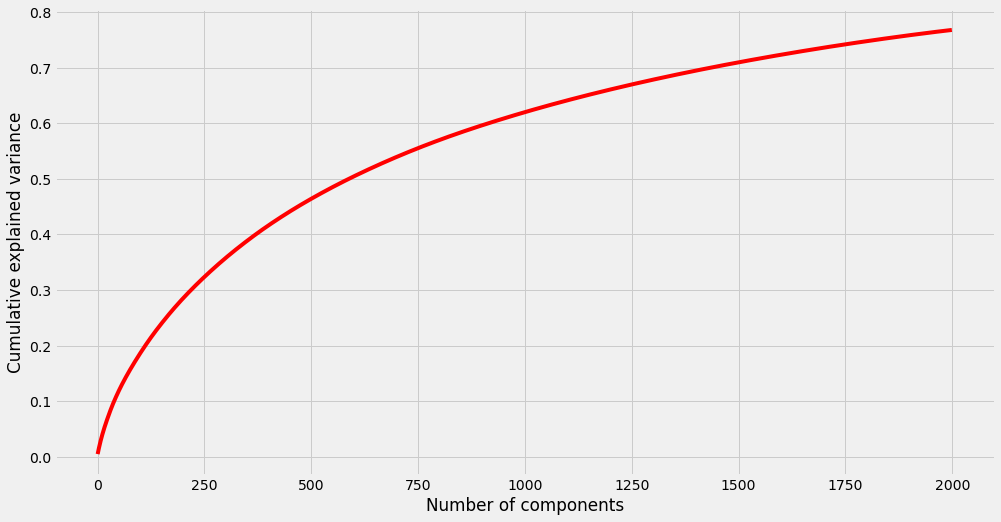

In [9]:
import matplotlib.pyplot as plt

# explains 80% of variance

NUM_COMPONENTS = 2000

sklearn_pca = PCA(NUM_COMPONENTS)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

variance_explained = np.cumsum(sklearn_pca.explained_variance_)

print(len(Y_sklearn[0]))

fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")



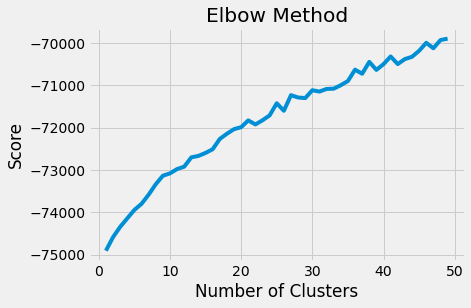

In [10]:

number_clusters = range(1, 50)

kmeans = [KMeans(n_clusters=i, max_iter = 75) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

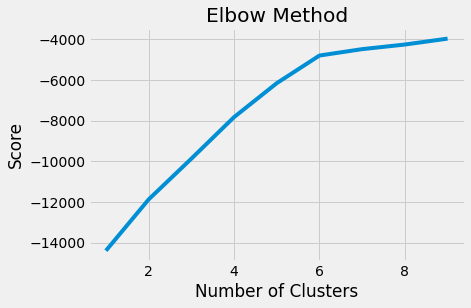

In [68]:

number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 75) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [63]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [64]:

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [65]:
dfs



[   features     score
 0    flavor  0.054083
 1    little  0.052929
 2   sharing  0.052688
 3   enjoyed  0.051872
 4     tasty  0.049629
 5    cheese  0.045978
 6   perfect  0.041358
 7     fresh  0.039007
 8     salad  0.037952
 9      love  0.037010
 10    cream  0.036998
 11    liked  0.035182
 12      tag  0.035182
 13  minutes  0.035095
 14     half  0.035074,
      features     score
 0   delicious  0.384404
 1     sharing  0.061447
 2        love  0.059469
 3        like  0.054350
 4       loved  0.051911
 5      flavor  0.050277
 6      little  0.049406
 7       fresh  0.047439
 8      cheese  0.045836
 9       cream  0.044755
 10      bread  0.042928
 11    perfect  0.042775
 12      quick  0.042747
 13    enjoyed  0.042235
 14      salad  0.042098,
    features     score
 0     sauce  0.549376
 1   chicken  0.155837
 2     loved  0.058801
 3    flavor  0.050066
 4    little  0.048327
 5    cooked  0.043486
 6      like  0.040139
 7   enjoyed  0.039771
 8     tasty  0.038041


In [66]:
# wordnet is a database of semantic relations for words
from nltk.corpus import wordnet
 
syn1 = wordnet.synsets('hello')[0]
syn2 = wordnet.synsets('selling')[0]
 
print ("hello name :  ", syn1.name())
print ("selling name :  ", syn2.name())


# for i, row in reviews.iterrows():

syn1.wup_similarity(syn2)
sorted(syn1.common_hypernyms(syn2))

ref = syn1.hypernyms()[0]
print ("Self comparison : ",
       syn1.shortest_path_distance(ref))
 
print ("Distance of hello from greeting : ",
       syn1.shortest_path_distance(syn2))
 
print ("Distance of greeting from hello : ",
       syn2.shortest_path_distance(syn1))

hello name :   hello.n.01
selling name :   selling.n.01
Self comparison :  1
Distance of hello from greeting :  11
Distance of greeting from hello :  11
